In [1]:
try:
  !pip install streamlit
  !pip install wordcloud
  !pip install matplotlib
except:
  print("As bibliotecas já instaladas! Parabêns, hora de fazer o código")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
from wordcloud import WordCloud


try:
  df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQd3Uv6rDQcZXGCUAXhuKhrad6dhLZ6Tdmv-0AVFlNIizd_AjJ-1djBNa-dlMlB-ZvH5mbl7hf5vWsd/pub?gid=848950540&single=true&output=csv')
except:
  #Em caso de sem internet
  df = pd.read_csv('imdb_top_1000.csv')

In [3]:
df.info()
#Vemos aqui que temos 111 certificados ausentes, 157 Meta score ausentes e 169 Gross ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [11]:
# Momento de tirar os 'is null' desse data frame na visão de dados medianas ou strings demonstrando que não foi informado
df['Certificate'].fillna("Não informado")

# Fazendo uma variável para armazenar a receita bruta na forma de inteiro (já que veio no dataset em str com virgulas separando)
Novo_Gross = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

# Fazendo a mediana (agora que podemos fazer depois de tirar de str para float)
mediana_gross = Novo_Gross.median()

#Trocando os com Gross NaN pela mediana_gross
Novo_Gross.fillna(mediana_gross, inplace=True)

#Fazendo nossa coluna do Gross pela nova coluna com inteiros!
df['Gross'] = Novo_Gross

# Código para trocar os valores nulos em Meta_score pela mediana
# Verificando se há valores nulos na coluna 'Meta_score' e contando-os
valores_nulos = df['Meta_score'].isnull().sum()
print(f"Quantidade de valores nulos em 'Meta_score': {valores_nulos}, trocaremos esses valores pela mediana!")

# Calculando a mediana da coluna 'Meta_score' (excluindo valores nulos)
mediana_meta_score = df['Meta_score'].dropna().median()

# Preenchendo os valores nulos com a mediana
df.fillna({'Meta_score' : mediana_meta_score}, inplace=True)

Quantidade de valores nulos em 'Meta_score': 157, trocaremos esses valores pela mediana!


In [12]:
# As médias/modas/medianas possíveis (fáceis de se achar) desses nossos dados
print("Media do número de votos:" + str(sum(df["No_of_Votes"])/len(df["No_of_Votes"])))

print("IMDB:\n")
print("A média de nota desses filmes é: " + str(round(df["IMDB_Rating"].mean(),2)))

print("Há um total de "+ str(len(df["IMDB_Rating"][df["IMDB_Rating"]>=df["IMDB_Rating"].mean()])) + " filmes acima da média")

print("A moda é: " + str(df["IMDB_Rating"].mode()[0]))

print("A mediana é: " + str(df["IMDB_Rating"].median()))

print("O desvio padrão é: " + str(round(df["IMDB_Rating"].std(),4)))

print("O filme que tem maior nota IMDB é: " + str(df["Series_Title"][df["IMDB_Rating"]==df["IMDB_Rating"].max()].values[0]) + " sendo sua nota de: " + str(df["IMDB_Rating"].max()))

print("O filme que tem menor nota IMDB é: " + str(df["Series_Title"][df["IMDB_Rating"]==df["IMDB_Rating"].min()].values[0]) + " sendo sua nota de: " + str(df["IMDB_Rating"].min()))

diferenca = df["IMDB_Rating"].max() - df["IMDB_Rating"].min()
print("A diferença entre o maior e o menor valor é: " + str(round(diferenca,2)) + "\n")

print("Meta score: \n")
print("A média de nota desses filmes é: " +str(round(df["Meta_score"].mean(),2)))

print("Há um total de "+ str(len(df["Meta_score"][df["Meta_score"]>=df["Meta_score"].mean()])) + " filmes acima da média")
print("A moda é: " + str(df["Meta_score"].mode()[0]))

print("A mediana é: " + str(df["Meta_score"].median()))

print("O desvio padrão é: " + str(round(df["Meta_score"].std(),4)))

print("O filme que tem maior nota Meta score é: " + str(df["Series_Title"][df["Meta_score"]==df["Meta_score"].max()].values[0]) + " sendo sua nota de: " + str(df["Meta_score"].max()))

print("O filme que tem menor nota Meta score é: " + str(df["Series_Title"][df["Meta_score"]==df["Meta_score"].min()].values[0]) + " sendo sua nota de: " + str(df["Meta_score"].min()))

print("A diferença entre o maior e o menor valor é: " + str(round(df["Meta_score"].max() - df["Meta_score"].min(),2)))

# Como foi visto, o Meta score apresenta maior variação total além de poder haver mais coisas 'estranhas' aí dentro, mas uma coisa que podemos afirmar é que estão certíssimos do The Godfather nota 100

print("")

# Calculando a Moda do ano de lançamento dos filmes
moda_do_Cinema = df["Released_Year"].mode()
print("A moda dos anos que houve maior lançamento de filmes segundo essa Data é: " + str(moda_do_Cinema[0]))


print(f"O filme que tem maior Custo foi: {df['Series_Title'][Novo_Gross == Novo_Gross.max()].values[0]} e seu valor foi de: {Novo_Gross[Novo_Gross == Novo_Gross.max()].values[0]} de dolares")
print(f"O filme que tem menor Custo foi: {df['Series_Title'][Novo_Gross == Novo_Gross.min()].values[0]} e seu valor foi de: {Novo_Gross[Novo_Gross == Novo_Gross.min()].values[0]} de dolares")

# Extraindo os números da coluna "Runtime" que tem 'min' na palavra
Nova_coluna = df['Runtime'].str.extract('(\d+)').astype(int)

# Calculando a média da nova coluna numérica
print(f"A média de duração dos filmes é: {str(Nova_coluna.mean()[0])} minutos")

i_max = Nova_coluna.idxmax()
i_min = Nova_coluna.idxmin()

print(f"O maior tempo de duração é: {str(Nova_coluna.max()[0])} minutos e seu filme é: {str(df.loc[i_max,'Series_Title'])}")
print(f"O menor tempo de duração é: {str(Nova_coluna.min()[0])} minutos e seu filme é: {str(df.loc[i_min,'Series_Title'])}")

# Separando os gêneros e contando a frequência de cada um
generos = df['Genre'].str.split(',').explode().str.strip().value_counts()
print("A moda de gêneros é o: " + str(generos.index[0]))
print("O genero mais raro é: " + str(generos.index[len(generos)-1]))


Media do número de votos:273692.911
IMDB:

A média de nota desses filmes é: 7.95
Há um total de 463 filmes acima da média
A moda é: 7.7
A mediana é: 7.9
O desvio padrão é: 0.2755
O filme que tem maior nota IMDB é: The Shawshank Redemption sendo sua nota de: 9.3
O filme que tem menor nota IMDB é: Dark Waters sendo sua nota de: 7.6
A diferença entre o maior e o menor valor é: 1.7

Meta score: 

A média de nota desses filmes é: 78.13
Há um total de 589 filmes acima da média
A moda é: 79.0
A mediana é: 79.0
O desvio padrão é: 11.3682
O filme que tem maior nota Meta score é: The Godfather sendo sua nota de: 100.0
O filme que tem menor nota Meta score é: I Am Sam sendo sua nota de: 28.0
A diferença entre o maior e o menor valor é: 72.0

A moda dos anos que houve maior lançamento de filmes segundo essa Data é: 2014
O filme que tem maior Custo foi: Star Wars: Episode VII - The Force Awakens e seu valor foi de: 936662225.0 de dolares
O filme que tem menor Custo foi: Mr. Nobody e seu valor foi d

In [ ]:
# Extra: Minigame de dados : Usando os dados para se estimar a nota usando os atores e diretores com suas respectivas médias
def calcula_nota():
  '''Função que calcula a nota média do IMDB e Meta score considerando os dados das estrelas e dos diretores'''
  n=2 #No mínimo é necessário ter 1 diretor e 1 estrela, as outras 3 estrelas eu botei como 'opcional'
  print("Essa função é pra fazer um novo filme com os atores e diretores desse banco de dados e ver quanto seria a nota no IMDB e do Metascore desse filme.\n")
  diretor = input("Digite o nome do diretor: ")
  estrela1 = input("Digite o nome da primeira estrela: ")
  estrela2 = input("Digite o nome da segunda estrela: ")
  estrela3 = input("Digite o nome da terceira estrela: ")
  estrela4 = input("Digite o nome da quarta estrela: ")
  Gross = input("Digite o valor do Gross: ")
  nome_filme = input("Parabéns, o filme está com nomes fenomenais, mas qual seria o nome desse grandioso filme? ")

  while diretor not in df['Director'].values:
    print("Esse diretor não está na lista")
    diretor = input("Digite o nome do diretor: ")

  while estrela1 not in df['Star1'].values:
    print("Essa primeira estrela não está na lista")
    estrela1 = input("Digite o nome da primeira estrela: ")

  # Convertendo Gross para numérico
  Gross = pd.to_numeric(Gross.replace(',', ''), errors='coerce') #Transformando ele para os números igual nos Dados

  # Calculando a média do IMDB_Rating e Meta_score para o diretor
  media_imdb_diretor = df[df['Director'] == diretor]['IMDB_Rating'].mean()
  media_meta_score_diretor = df[df['Director'] == diretor]['Meta_score'].mean()

  # Calculando a média do IMDB_Rating e Meta_score para a Star1
  media_imdb_star1 = df[df['Star1'] == estrela1]['IMDB_Rating'].mean()
  media_meta_score_star1 = df[df['Star1'] == estrela1]['Meta_score'].mean()

  # Calculando a média do IMDB_Rating e Meta_score para a Star2 (opcional)
  if estrela2 in df['Star2'].values:
    media_imdb_star2 = df[df['Star2'] == estrela2]['IMDB_Rating'].mean()
    media_meta_score_star2 = df[df['Star2'] == estrela2]['Meta_score'].mean()
    n+=1
  else:
    media_imdb_star2 = 0
    media_meta_score_star2 = 0

  # Calculando a média do IMDB_Rating e Meta_score para a Star3 (opcional)
  if estrela3 in df['Star3'].values:
    media_imdb_star3 = df[df['Star3'] == estrela3]['IMDB_Rating'].mean()
    media_meta_score_star3 = df[df['Star3'] == estrela3]['Meta_score'].mean()
    n+=1
  else:
    media_imdb_star3 = 0
    media_meta_score_star3 = 0

  # Calculando a média do IMDB_Rating e Meta_score para a Star4 (opcional)
  if estrela4 in df['Star4'].values:
    media_imdb_star4 = df[df['Star4'] == estrela4]['IMDB_Rating'].mean()
    media_meta_score_star4 = df[df['Star4'] == estrela4]['Meta_score'].mean()
    n+=1
  else:
    media_imdb_star4 = 0
    media_meta_score_star4 = 0


  # Calculando a média de Gross para o diretor

  media_gross_diretor = df[df['Director'] == diretor]['Gross']
  if media_gross_diretor.dtype == 'object':
      media_gross_diretor = pd.to_numeric(media_gross_diretor.str.replace(',', ''), errors='coerce').mean()
  else:
      media_gross_diretor = media_gross_diretor.mean()

  # Calculando a relação entre o Gross do filme e a média de Gross do diretor
  relacao_gross = (Gross / media_gross_diretor) * 100 if media_gross_diretor else float('nan')

  # Calculando a média geral do IMDB_Rating e Meta_score
  media_geral_imdb = (media_imdb_diretor + media_imdb_star1 + media_imdb_star2 + media_imdb_star3 + media_imdb_star4) / n
  media_geral_meta_score = (media_meta_score_diretor + media_meta_score_star1 + media_meta_score_star2 + media_meta_score_star3 + media_meta_score_star4) / n

  print(f"Média do IMDB_Rating do diretor: {media_imdb_diretor}")
  print(f"Média do Meta_score do diretor: {media_meta_score_diretor}")
  print(f"Média do IMDB_Rating da Star1: {media_imdb_star1}")
  print(f"Média do Meta_score da Star1: {media_meta_score_star1}")
  print(f"Média do IMDB_Rating da Star2: {media_imdb_star2}")
  print(f"Média do Meta_score da Star2: {media_meta_score_star2}")
  print(f"Média do IMDB_Rating da Star3: {media_imdb_star3}")
  print(f"Média do Meta_score da Star3: {media_meta_score_star3}")
  print(f"Média do IMDB_Rating da Star4: {media_imdb_star4}")
  print(f"Média do Meta_score da Star4: {media_meta_score_star4}")
  print(f"Média de Gross do diretor: {media_gross_diretor}")
  print(f"Relação entre o Gross do filme e a média de Gross do diretor: {relacao_gross:.2f}%")
  print(f"Parabéns! Com esses atores e diretor o filme {nome_filme} teria nota: {media_geral_imdb} no IMDB")
  print(f"Parabéns! Com esses atores e diretor filme {nome_filme} teria nota: {media_geral_meta_score} no Meta score")

calcula_nota()

Digite o nome do diretor: Christopher Nolan
Digite o nome da primeira estrela: Marlon Brando
Digite o nome da segunda estrela: 
Digite o nome da terceira estrela: 
Digite o nome da quarta estrela: 
Digite o valor do Gross: 1000000.0
Parabéns, o filme está com nomes fenomenais, mas qual seria o nome desse grandioso filme? Poderoso Batman
Média do IMDB_Rating do diretor: 8.4625
Média do Meta_score do diretor: 77.5
Média do IMDB_Rating da Star1: 8.649999999999999
Média do Meta_score da Star1: 95.5
Média do IMDB_Rating da Star2: 0
Média do Meta_score da Star2: 0
Média do IMDB_Rating da Star3: 0
Média do Meta_score da Star3: 0
Média do IMDB_Rating da Star4: 0
Média do Meta_score da Star4: 0
Média de Gross do diretor: 242181763.25
Relação entre o Gross do filme e a média de Gross do diretor: 0.41%
Parabéns! Com esses atores e diretor o filme Poderoso Batman teria nota: 8.556249999999999 no IMDB
Parabéns! Com esses atores e diretor filme Poderoso Batman teria nota: 86.5 no Meta score


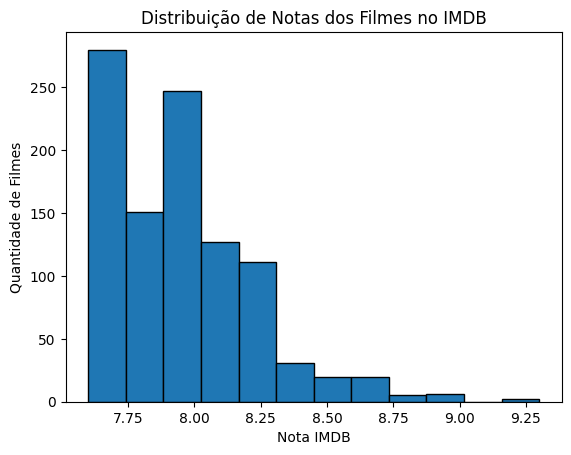

In [ ]:
# Crie o histograma
plt.hist(df['IMDB_Rating'], bins=12, edgecolor='black')

# Defina os títulos do gráfico
plt.title('Distribuição de Notas dos Filmes no IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Quantidade de Filmes')

# Exiba o gráfico
plt.show()
#Opa, como vemos no gráfico, a maioria dos filmes está entre 7.0 e 8.5 no IMDB, sendo múito difícil estar acima de 9

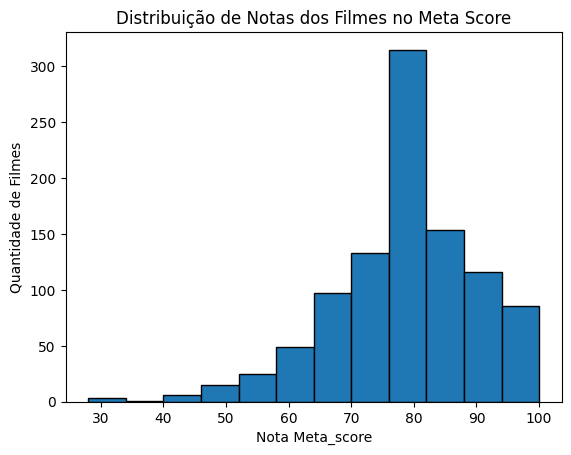

In [ ]:
# Criando um histograma
plt.hist(df["Meta_score"], bins=12, edgecolor='black')

# Definindo os títulos do gráfico
plt.title('Distribuição de Notas dos Filmes no Meta Score')
plt.xlabel('Nota Meta_score')
plt.ylabel('Quantidade de Filmes')

# Exibindo o gráfico
plt.show()

#Já aqui, a coisa é completamente diferente, vemos no gráfico que a maioria dos filmes está entre 60 e 90 no Meta Score, sendo difícil estar acima de 90 e com casos raríssimos de estar abaixo de 55

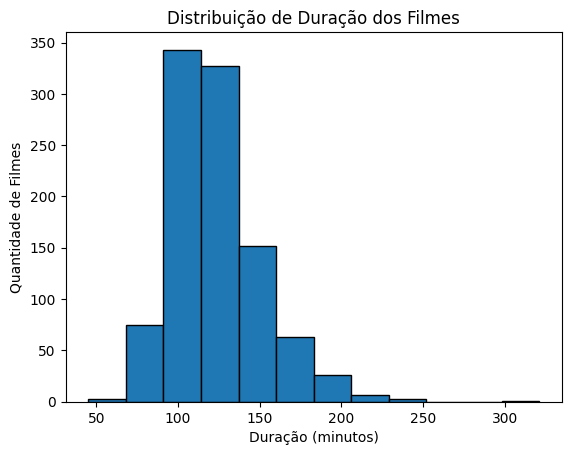

In [ ]:
# Gráfico do tempo

plt.hist(Nova_coluna, bins=12, edgecolor='black')
plt.title('Distribuição de Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.show()

# Aqui vemos que a maioria dos filmes contem entre 100 a 200 horas


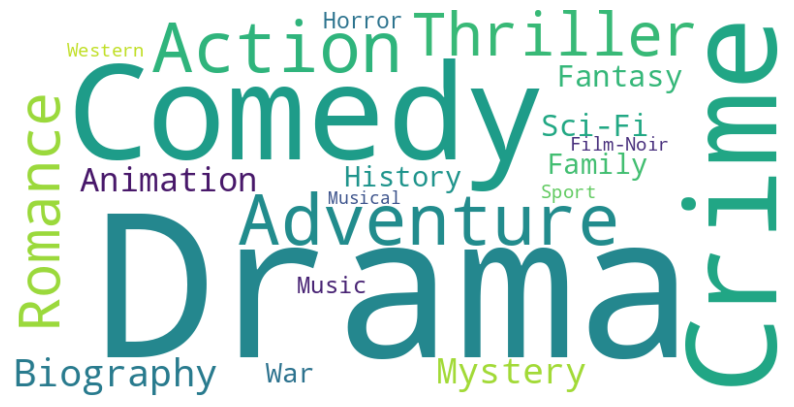

In [ ]:
# Exibir a WordCloud usando Matplotlib
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

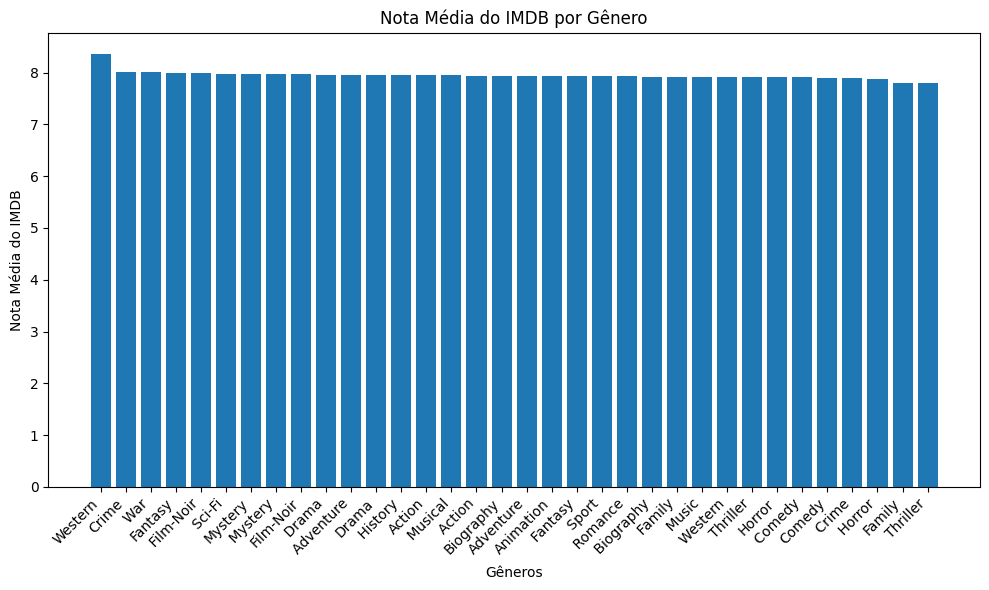

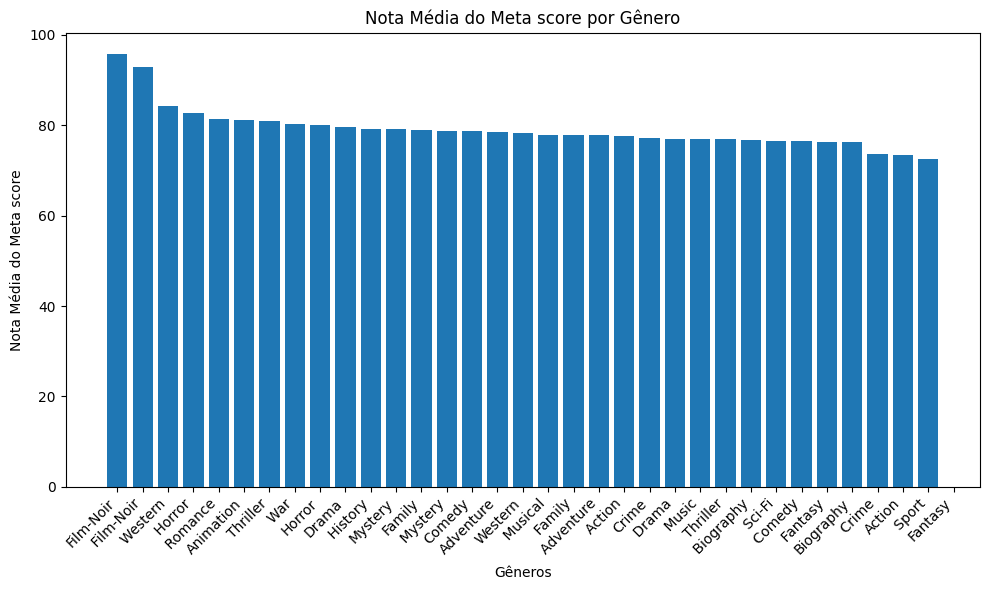

In [ ]:
# Agrupar por gênero e calcular a média do IMDB_Rating
genero_notas_IMDB = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre').groupby('Genre')['IMDB_Rating'].agg('mean').sort_values(ascending=False)
genero_notas_Meta = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre').groupby('Genre')['Meta_score'].agg('mean').sort_values(ascending=False)


# Criar o gráfico de barras do IMDB
plt.figure(figsize=(10, 6))
plt.bar(genero_notas_IMDB.index, genero_notas_IMDB.values)
plt.xlabel("Gêneros")
plt.ylabel("Nota Média do IMDB")
plt.title("Nota Média do IMDB por Gênero")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criar o gráfico de barras do Meta score
plt.figure(figsize=(10, 6))
plt.bar(genero_notas_Meta.index, genero_notas_Meta.values)
plt.xlabel("Gêneros")
plt.ylabel("Nota Média do Meta score")
plt.title("Nota Média do Meta score por Gênero")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()